In [57]:
import pandas as pd
import datetime
import math
import numpy as np
import pandas_datareader.data as web
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
from pandas.plotting import scatter_matrix
from sklearn import preprocessing


%matplotlib inline

In [38]:
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2019,6,1)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-24,182.139999,178.619995,180.199997,178.970001,23714700.0,178.292587
2019-05-28,180.589996,177.910004,178.919998,178.229996,27948200.0,177.555389
2019-05-29,179.350006,176.000000,176.419998,177.380005,28481200.0,176.708603
2019-05-30,179.229996,176.669998,177.949997,178.300003,21218400.0,177.625122
2019-05-31,177.990005,174.990005,176.229996,175.070007,27043600.0,174.407349


In [39]:
close_px = df['Adj Close']
mavg = close_px.rolling(window = 100).mean()
mavg.tail()

Date
2019-05-24    179.124881
2019-05-28    179.339940
2019-05-29    179.701968
2019-05-30    180.013181
2019-05-31    180.295476
Name: Adj Close, dtype: float64

<function matplotlib.pyplot.legend(*args, **kwargs)>

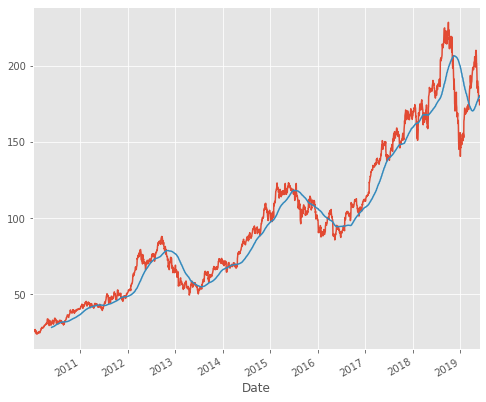

In [40]:
mpl.rc('figure', figsize=(8,7))
style.use('ggplot')

close_px.plot(label = 'AAPL')
mavg.plot(label = 'mavg')
plt.legend

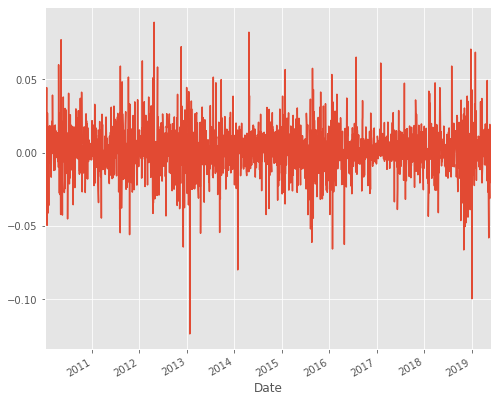

In [41]:
rets = close_px / close_px.shift(1) - 1

rets.plot(label = "return")

In [42]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'], 'yahoo', start=start, end=end)['Adj Close']
dfcomp.tail()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2019-05-24,178.292587,9.430717,1133.469971,130.739548,125.821022
2019-05-28,177.555389,9.340901,1134.150024,128.940750,125.741287
2019-05-29,176.708603,9.350882,1116.459961,128.179703,124.525337
2019-05-30,177.625122,9.450677,1117.949951,128.061111,125.312714
2019-05-31,174.407349,9.420737,1103.630005,125.511147,123.269516


In [43]:
retscomp = dfcomp.pct_change()

corr = retscomp.corr()

corr.tail()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Symbols,,,,,
AAPL,1.000000,0.314283,0.460484,0.377317,0.450028
GE,0.314283,1.000000,0.337063,0.440322,0.363694
GOOG,0.460484,0.337063,1.000000,0.404424,0.535728
IBM,0.377317,0.440322,0.404424,1.000000,0.487366
MSFT,0.450028,0.363694,0.535728,0.487366,1.000000


Text(0, 0.5, 'Returns GE')

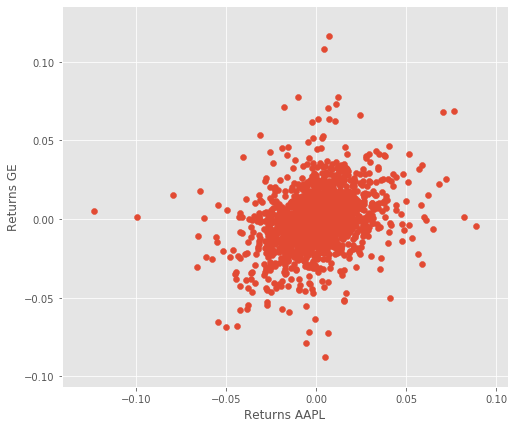

In [44]:
plt.scatter(retscomp.AAPL, retscomp.GE)
plt.xlabel('Returns AAPL')
plt.ylabel('Returns GE')

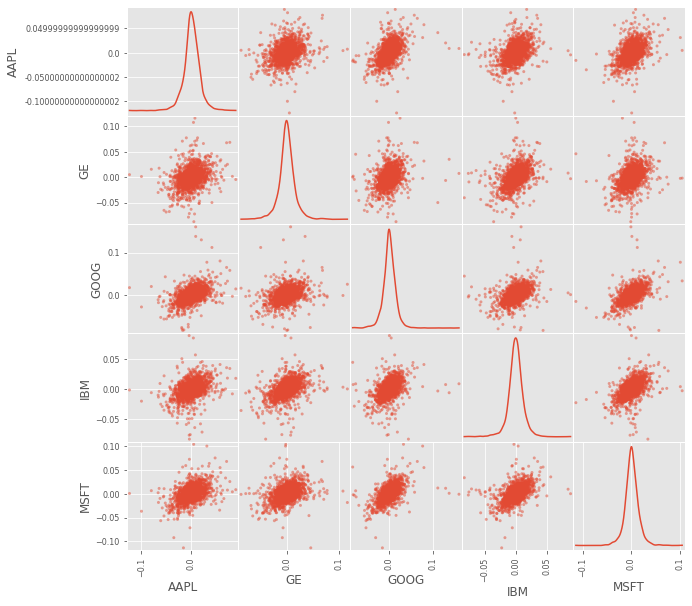

In [46]:
scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

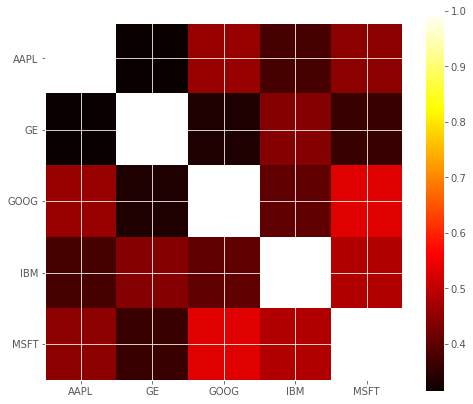

In [47]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

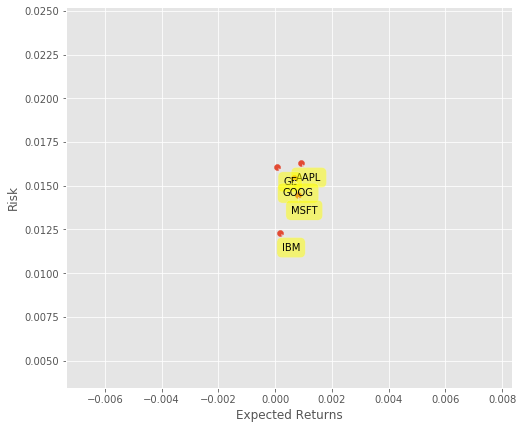

In [49]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected Returns')
plt.ylabel('Risk')

for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (20, -20),
        textcoords  = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [51]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2010-01-04,26.681330,123432400.0,0.990606,0.271752
2010-01-05,26.727465,150476200.0,1.091520,-0.102519
2010-01-06,26.302330,138040000.0,2.123523,-1.590633
2010-01-07,26.253704,119282800.0,1.400893,-0.552538
2010-01-08,26.428249,111902700.0,1.386924,0.798864


In [58]:
dfreg.fillna(value = -99999, inplace = True)

forecast_out = int(math.ceil(0.01 * len(dfreg)))

forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

X = preprocessing.scale(X)

X_lately = X[-forecast_out:]
X = X[:-forecast_out]

y = np.array(dfreg['label'])
y = y[:-forecast_out]

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [68]:
clfreg = LinearRegression(n_jobs = -1)
clfreg.fit(X_train, y_train)

NameError: name 'X_train' is not defined